### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [2]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        
        # Implement!
        
        return A
    
    # Implement!
    
    return policy, V

In [3]:
import numpy as np

def value_iteration_for_gamblers(p_h, theta=1e-6, max_iters=1000):
    # Number of states (capital levels)
    n_states = 101
    # Initialize the value function
    V = np.zeros(n_states)
    # Initialize the policy (stake)
    policy = np.zeros(n_states, dtype=int)
    
    for _ in range(max_iters):
        delta = 0
        for s in range(1, n_states - 1):
            best_action_value = 0
            for a in range(1, min(s, 100 - s) + 1):
                # Calculate the expected return for each action
                heads_result = p_h * (V[s + a] + 1)
                tails_result = (1 - p_h) * V[s - a]
                action_value = heads_result + tails_result

                if action_value > best_action_value:
                    best_action_value = action_value
                    policy[s] = a

            # Update the value function
            delta = max(delta, abs(V[s] - best_action_value))
            V[s] = best_action_value

        if delta < theta:
            break
    
    return policy, V

# Set the probability of heads (p_h)
p_h = 0.25
# Call the function to find the optimal policy and state-value function
optimal_policy, optimal_value = value_iteration_for_gamblers(p_h)

# Print the results
print("Optimal Policy:")
print(optimal_policy[1:100])  # Exclude the 0 and 100 capital levels
print("")

print("Optimal Value Function:")
print(optimal_value[1:100])  # Exclude the 0 and 100 capital levels


Optimal Policy:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Optimal Value Function:
[ 0.5         1.          1.5         2.          2.5         3.
  3.5         4.          4.5         5.          5.5         6.
  6.5         7.          7.5         8.          8.5         9.
  9.5        10.         10.5        11.         11.5        12.
 12.5        13.         13.5        14.         14.5        15.
 15.5        16.         16.5        17.         17.5        18.
 18.5        19.         19.5        20.         20.5        21.
 21.5        22.         22.5        23.         23.5        24.
 24.5        25.         25.5        26.         26.5        27.
 27.5        28.         28.5        29.         29.5        30.
 30.5        31.         31.5        32.         32.49999999 32.99999999
 33.49999999 33.99999999 34.499999

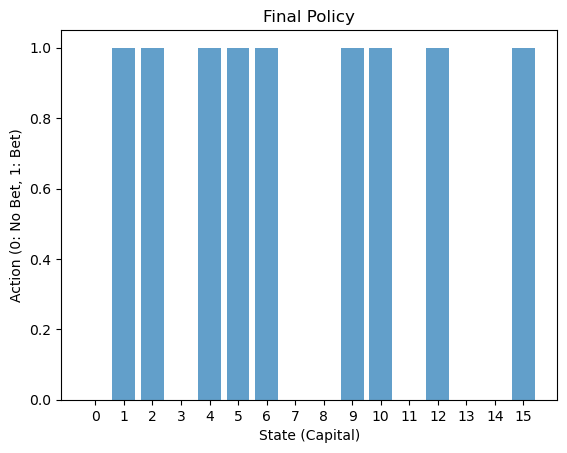

In [4]:
# Plotting Final Policy (action stake) vs State (Capital)

# Implement!
import matplotlib.pyplot as plt
import numpy as np

# Example policy (replace with your actual policy)
policy = np.array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

# States (capital)
states = np.arange(len(policy))

# Actions (0 or 1)
actions = policy

# Create a bar plot
plt.bar(states, actions, align='center', alpha=0.7)
plt.xlabel('State (Capital)')
plt.ylabel('Action (0: No Bet, 1: Bet)')
plt.title('Final Policy')
plt.xticks(states)
plt.show()


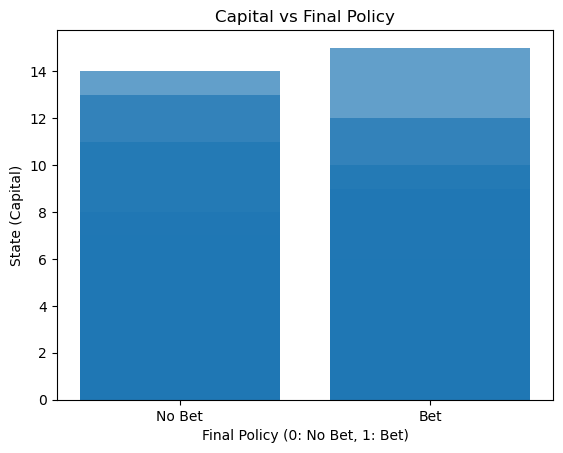

In [5]:
# Plotting Capital vs Final Policy

# Implement!
import matplotlib.pyplot as plt
import numpy as np

# Example policy (replace with your actual policy)
policy = np.array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

# States (capital)
states = np.arange(len(policy))

# Create a bar plot
plt.bar(policy, states, align='center', alpha=0.7)
plt.xlabel('Final Policy (0: No Bet, 1: Bet)')
plt.ylabel('State (Capital)')
plt.title('Capital vs Final Policy')
plt.xticks([0, 1], ['No Bet', 'Bet'])
plt.show()

